In [1]:
import os
import warnings

In [2]:
dataset = "presidential.csv"

# currnet file directory
wd = os.getcwd()

# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [3]:
import numpy as np 
import pandas as pd 

import os
# file list in current folder
print(os.listdir("./"))

['.ipynb_checkpoints', '.RData', '.Rhistory', 'airlines.csv', 'Batting.csv', 'dataI.R', 'flights.csv', 'Master.csv', 'm_04.ipynb', 'm_04.py', 'm_04_data.R', 'presidential.csv', 'Teams.csv']


In [4]:
# Pandas Data Structure - DataFrame
# The dataframe is a two-dimensional data structure. It contains columns.
df = pd.read_csv(dataset)
type(df)

pandas.core.frame.DataFrame

In [5]:
# It is important to check data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
name     11 non-null object
start    11 non-null object
end      11 non-null object
party    11 non-null object
dtypes: object(4)
memory usage: 432.0+ bytes


In [6]:
df.shape

(11, 4)

In [7]:
df.columns

Index(['name', 'start', 'end', 'party'], dtype='object')

In [8]:
df.describe()

,name,start,end,party
count,11,11,11,11
unique,10,11,11,2
top,Bush,2001-01-20,1963-11-22,Republican
freq,2,1,1,6


In [9]:
df.head()

,name,start,end,party
0,Eisenhower,1953-01-20,1961-01-20,Republican
1,Kennedy,1961-01-20,1963-11-22,Democratic
2,Johnson,1963-11-22,1969-01-20,Democratic
3,Nixon,1969-01-20,1974-08-09,Republican
4,Ford,1974-08-09,1977-01-20,Republican


In [10]:
# df.iloc[[n],[n]]
# This code brings the data in the N row and N column in the DataFrame.
df.iloc[[0],[3]]

,party
0,Republican


In [11]:
# df.loc[n:n]
# This code allows us to fetch the data in the range we specify.
df.loc[5:7]

,name,start,end,party
5,Carter,1977-01-20,1981-01-20,Democratic
6,Reagan,1981-01-20,1989-01-20,Republican
7,Bush,1989-01-20,1993-01-20,Republican


In [12]:
# like select in R & SQL
df[["name", "party"]]

,name,party
0,Eisenhower,Republican
1,Kennedy,Democratic
2,Johnson,Democratic
3,Nixon,Republican
4,Ford,Republican
5,Carter,Democratic
6,Reagan,Republican
7,Bush,Republican
8,Clinton,Democratic
9,Bush,Republican


In [13]:
df[df["party"] == "Republican"]

# OR

filters = df["party"] == "Republican"
df[filters]

,name,start,end,party
0,Eisenhower,1953-01-20,1961-01-20,Republican
3,Nixon,1969-01-20,1974-08-09,Republican
4,Ford,1974-08-09,1977-01-20,Republican
6,Reagan,1981-01-20,1989-01-20,Republican
7,Bush,1989-01-20,1993-01-20,Republican
9,Bush,2001-01-20,2009-01-20,Republican


In [14]:
# Because the column ["start"] is "String" data type.

# NO
# df[(df["start"] > 1973) & (df["party"] == "Democratic")]

# YES
df[(df["start"] > "1973") & (df["party"] == "Democratic")]

,name,start,end,party
5,Carter,1977-01-20,1981-01-20,Democratic
8,Clinton,1993-01-20,2001-01-20,Democratic
10,Obama,2009-01-20,2017-01-20,Democratic


In [15]:
# if data type is String, there are several ways to control data
# Ex. upper, lower, split, replace, (con)cat ...

df["start"].str.split("-", expand=True, n=1) # n is limit the number of splits

,0,1
0,1953,01-20
1,1961,01-20
2,1963,11-22
3,1969,01-20
4,1974,08-09
5,1977,01-20
6,1981,01-20
7,1989,01-20
8,1993,01-20
9,2001,01-20


In [16]:
# isin & isnull is also good method to use.
df[df["party"].isin(["Democratic"])].head()

,name,start,end,party
1,Kennedy,1961-01-20,1963-11-22,Democratic
2,Johnson,1963-11-22,1969-01-20,Democratic
5,Carter,1977-01-20,1981-01-20,Democratic
8,Clinton,1993-01-20,2001-01-20,Democratic
10,Obama,2009-01-20,2017-01-20,Democratic


In [17]:
# mutate() in R -> Defining New Column
# And to calculate the interval of date
# We should change the data type string to datetime64
df["start"] = pd.to_datetime(df["start"])
df["end"] = pd.to_datetime(df["end"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
name     11 non-null object
start    11 non-null datetime64[ns]
end      11 non-null datetime64[ns]
party    11 non-null object
dtypes: datetime64[ns](2), object(2)
memory usage: 432.0+ bytes


In [18]:
# to control date very well, we can figure out how to control data type "datetime64"
df["length"] = (df["end"]-df["start"]).astype('timedelta64[Y]')
df

,name,start,end,party,length
0,Eisenhower,1953-01-20,1961-01-20,Republican,8.0
1,Kennedy,1961-01-20,1963-11-22,Democratic,2.0
2,Johnson,1963-11-22,1969-01-20,Democratic,5.0
3,Nixon,1969-01-20,1974-08-09,Republican,5.0
4,Ford,1974-08-09,1977-01-20,Republican,2.0
5,Carter,1977-01-20,1981-01-20,Democratic,4.0
6,Reagan,1981-01-20,1989-01-20,Republican,8.0
7,Bush,1989-01-20,1993-01-20,Republican,4.0
8,Clinton,1993-01-20,2001-01-20,Democratic,8.0
9,Bush,2001-01-20,2009-01-20,Republican,8.0


In [19]:
# some function just return changed DataFrame.
# So, we need to put the changed DataFrame into previous one
df['elected'] = df['start'].map(lambda x: x.year) + 1

In [20]:
df

,name,start,end,party,length,elected
0,Eisenhower,1953-01-20,1961-01-20,Republican,8.0,1954
1,Kennedy,1961-01-20,1963-11-22,Democratic,2.0,1962
2,Johnson,1963-11-22,1969-01-20,Democratic,5.0,1964
3,Nixon,1969-01-20,1974-08-09,Republican,5.0,1970
4,Ford,1974-08-09,1977-01-20,Republican,2.0,1975
5,Carter,1977-01-20,1981-01-20,Democratic,4.0,1978
6,Reagan,1981-01-20,1989-01-20,Republican,8.0,1982
7,Bush,1989-01-20,1993-01-20,Republican,4.0,1990
8,Clinton,1993-01-20,2001-01-20,Democratic,8.0,1994
9,Bush,2001-01-20,2009-01-20,Republican,8.0,2002


In [21]:
df.loc[(df["elected"] == 1962) | (df["elected"] == 1973), "elected"] = 'NA' 

In [22]:
df

,name,start,end,party,length,elected
0,Eisenhower,1953-01-20,1961-01-20,Republican,8.0,1954
1,Kennedy,1961-01-20,1963-11-22,Democratic,2.0,NA
2,Johnson,1963-11-22,1969-01-20,Democratic,5.0,1964
3,Nixon,1969-01-20,1974-08-09,Republican,5.0,1970
4,Ford,1974-08-09,1977-01-20,Republican,2.0,1975
5,Carter,1977-01-20,1981-01-20,Democratic,4.0,1978
6,Reagan,1981-01-20,1989-01-20,Republican,8.0,1982
7,Bush,1989-01-20,1993-01-20,Republican,4.0,1990
8,Clinton,1993-01-20,2001-01-20,Democratic,8.0,1994
9,Bush,2001-01-20,2009-01-20,Republican,8.0,2002


In [23]:
df = df.rename(columns= {'length' : 'term_length'})

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 6 columns):
name           11 non-null object
start          11 non-null datetime64[ns]
end            11 non-null datetime64[ns]
party          11 non-null object
term_length    11 non-null float64
elected        11 non-null object
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 608.0+ bytes


In [25]:
df.sort_values('term_length', ascending=False)

,name,start,end,party,term_length,elected
0,Eisenhower,1953-01-20,1961-01-20,Republican,8.0,1954
6,Reagan,1981-01-20,1989-01-20,Republican,8.0,1982
8,Clinton,1993-01-20,2001-01-20,Democratic,8.0,1994
9,Bush,2001-01-20,2009-01-20,Republican,8.0,2002
10,Obama,2009-01-20,2017-01-20,Democratic,8.0,2010
2,Johnson,1963-11-22,1969-01-20,Democratic,5.0,1964
3,Nixon,1969-01-20,1974-08-09,Republican,5.0,1970
5,Carter,1977-01-20,1981-01-20,Democratic,4.0,1978
7,Bush,1989-01-20,1993-01-20,Republican,4.0,1990
1,Kennedy,1961-01-20,1963-11-22,Democratic,2.0,NA


In [26]:
df

,name,start,end,party,term_length,elected
0,Eisenhower,1953-01-20,1961-01-20,Republican,8.0,1954
1,Kennedy,1961-01-20,1963-11-22,Democratic,2.0,NA
2,Johnson,1963-11-22,1969-01-20,Democratic,5.0,1964
3,Nixon,1969-01-20,1974-08-09,Republican,5.0,1970
4,Ford,1974-08-09,1977-01-20,Republican,2.0,1975
5,Carter,1977-01-20,1981-01-20,Democratic,4.0,1978
6,Reagan,1981-01-20,1989-01-20,Republican,8.0,1982
7,Bush,1989-01-20,1993-01-20,Republican,4.0,1990
8,Clinton,1993-01-20,2001-01-20,Democratic,8.0,1994
9,Bush,2001-01-20,2009-01-20,Republican,8.0,2002


In [27]:
# Define the aggregation calculations
aggregations = {
    "party": { # work on the "party" column
        "N": "count" 
    },
    "start": {     # Now work on the "date" column
        'min_date': "min",
    },
    "end": {
        "max_date": "max" # Find the max, call the result "max_date"
    },
    "term_length": "mean"
}
# Perform groupby aggregation by "month", but only on the rows that are of type "call"
df.groupby('party').agg(aggregations)

C:\Users\ddacc\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


,party,start,end,term_length
,N,min_date,max_date,mean
party,,,,
Democratic,5,1961-01-20,2017-01-20,5.400000
Republican,6,1953-01-20,2009-01-20,5.833333


In [28]:
Teams = pd.read_csv("Teams.csv")

In [29]:
Teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [30]:
Teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 48 columns):
yearID            2895 non-null int64
lgID              2845 non-null object
teamID            2895 non-null object
franchID          2895 non-null object
divID             1378 non-null object
Rank              2895 non-null int64
G                 2895 non-null int64
Ghome             2496 non-null float64
W                 2895 non-null int64
L                 2895 non-null int64
DivWin            1350 non-null object
WCWin             714 non-null object
LgWin             2867 non-null object
WSWin             2538 non-null object
R                 2895 non-null int64
AB                2895 non-null int64
H                 2895 non-null int64
X2B               2895 non-null int64
X3B               2895 non-null int64
HR                2895 non-null int64
BB                2894 non-null float64
SO                2879 non-null float64
SB                2769 non-null float64
CS  

In [31]:
mets = Teams[Teams["teamID"] == "NYN"]

In [32]:
myMets = mets[(mets["yearID"] >= 2004) & (mets["yearID"] <= 2012)]

In [33]:
myMets = myMets[["yearID", "teamID", "W", "L"]]

In [34]:
myMets

# other method is just what we learned about

,yearID,teamID,W,L
2464,2004,NYN,71,91
2493,2005,NYN,83,79
2523,2006,NYN,97,65
2553,2007,NYN,88,74
2583,2008,NYN,89,73
2613,2009,NYN,70,92
2643,2010,NYN,79,83
2673,2011,NYN,77,85
2703,2012,NYN,74,88


In [35]:
flights = pd.read_csv("flights.csv")

In [36]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 48.8+ MB


In [37]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [38]:
airlines = pd.read_csv("airlines.csv")

In [39]:
airlines.head()

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.


In [40]:
flightJoined = pd.merge(left=flights,right=airlines, left_on="carrier", right_on="carrier")

In [41]:
flightJoined[["carrier", "name", "flight", "origin", "dest"]]

,carrier,name,flight,origin,dest
0,UA,United Air Lines Inc.,1545,EWR,IAH
1,UA,United Air Lines Inc.,1714,LGA,IAH
2,UA,United Air Lines Inc.,1696,EWR,ORD
3,UA,United Air Lines Inc.,194,JFK,LAX
4,UA,United Air Lines Inc.,1124,EWR,SFO
5,UA,United Air Lines Inc.,1187,EWR,LAS
6,UA,United Air Lines Inc.,1077,EWR,MIA
7,UA,United Air Lines Inc.,303,JFK,SFO
8,UA,United Air Lines Inc.,496,LGA,IAH
9,UA,United Air Lines Inc.,1665,EWR,LAX


In [42]:
flightLeftJoined = pd.merge(left=flights,right=airlines, how='left', left_on="carrier", right_on="carrier")

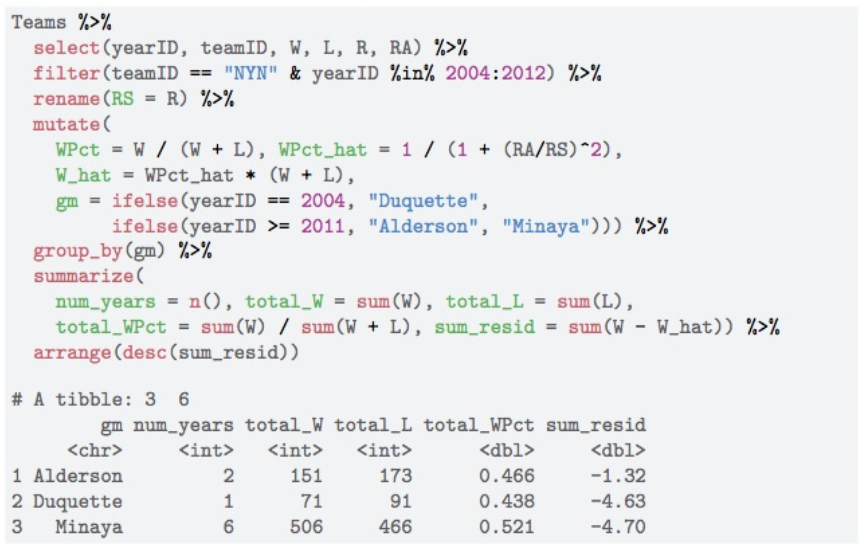

In [43]:
Teams = Teams[["yearID", "teamID", "W", "L", "R", "RA"]]

In [44]:
Teams = Teams[(Teams["teamID"] == "NYN") & (Teams["yearID"] >= 2004) & (Teams["yearID"] <= 2012)]

In [45]:
Teams = Teams.rename(columns= {'R' : 'RS'})

In [46]:
Teams["WPct"] = Teams["W"] / (Teams["W"] + Teams["L"])

In [47]:
Teams["WPct_hat"] = 1 / (1 + (Teams["RA"]/Teams["RS"])*(Teams["RA"]/Teams["RS"]))

In [48]:
Teams["W_hat"] = Teams["WPct_hat"] * (Teams["W"] + Teams["L"])

In [49]:
conditions = [
    (Teams["yearID"] == 2004),
    (Teams["yearID"] >= 2011)]

choices = ["Duquette", "alderson"]

Teams["gm"] = np.select(conditions, choices, default="Minaya")

In [50]:
Teams.head()

,yearID,teamID,W,L,RS,RA,WPct,WPct_hat,W_hat,gm
2464,2004,NYN,71,91,684,731,0.438272,0.466821,75.625011,Duquette
2493,2005,NYN,83,79,722,648,0.512346,0.553857,89.724909,Minaya
2523,2006,NYN,97,65,834,731,0.598765,0.565531,91.615997,Minaya
2553,2007,NYN,88,74,804,750,0.543210,0.534707,86.622554,Minaya
2583,2008,NYN,89,73,799,715,0.549383,0.555312,89.960528,Minaya


In [51]:
# Define the aggregation calculations
aggregations = {
    "gm": { # work on the "party" column
        "N": "count" 
    },
    "W": {
        "total_W": "sum"
    },
    "L": {
        "total_L": "sum"
    },
    "WPct": {
        "total_WPct": "sum"
    }
}
# Perform groupby aggregation by "month", but only on the rows that are of type "call"
Teams = Teams.groupby("gm").agg(aggregations)

# Extended example: Manny Ramirez

In [52]:
import pandas as pd
import numpy as np

In [53]:
batting = pd.read_csv("Batting.csv")

In [54]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [55]:
batting = batting[(batting["playerID"] == "ramirma02")]

In [56]:
batting.shape

(21, 22)

In [57]:
col = ["span", "numYears", "numTeams", "BA", "tH", "tHR", "tRBI"]

val = []
val.append(str(batting["yearID"].min())+"-"+str(batting["yearID"].max()))
val.append(len(batting["yearID"].value_counts()))
val.append(len(batting["teamID"].value_counts()))
val.append(batting["H"].sum()/batting["AB"].sum())
val.append(batting["H"].sum())
val.append(batting["HR"].sum())
val.append(batting["RBI"].sum())

data = {}

for i in range(7):
    data[col[i]] = [val[i]]

In [58]:
summarize = pd.DataFrame.from_dict(data)

In [59]:
summarize

,span,numYears,numTeams,BA,tH,tHR,tRBI
0,1993-2011,19,5,0.312227,2574,555,1831.0


In [60]:
batting = pd.read_csv("Batting.csv")
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [61]:
aggregations = {
    "yearID": { "span": lambda x: str(min(x))+"-"+str(max(x)),
                "numYears": lambda x: len(x.value_counts())},
    "teamID": { "numTeams": lambda x: len(x.value_counts())},
    "H": {"tH": "sum"},
    "AB": {"tAB": "sum"},
    "HR": {"tHR": "sum"},
    "RBI": {"tRBI": "sum"}
}

In [62]:
grouping = batting.groupby("teamID").agg(aggregations)
grouping["BA"] = grouping["H"]["tH"]/grouping["AB"]["tAB"]
grouping.head()

yearID            teamID      H      AB     HR      RBI        BA
             span numYears numTeams     tH     tAB    tHR     tRBI          
teamID                                                                      
ALT     1884-1884        1        1    223     899      2      0.0  0.248053
ANA     1997-2004        8        1  12165   44771   1324   5967.0  0.271716
ARI     1998-2018       21        1  29903  116343   3573  14694.0  0.257024
ATL     1966-2018       53        1  73895  287307   7997  34660.0  0.257199
BAL     1954-2018       65        1  90314  351796  10265  42821.0  0.256723

In [63]:
grouping = batting.groupby("lgID").agg(aggregations)
grouping["BA"] = grouping["H"]["tH"]/grouping["AB"]["tAB"]
grouping.head()

yearID            teamID        H       AB      HR       RBI  \
           span numYears numTeams       tH      tAB     tHR      tRBI   
lgID                                                                    
AA    1882-1891       10       25    88690   353740    1907   35437.0   
AL    1901-2018      118       26  1755376  6689715  149808  818930.0   
FL    1914-1915        2        9    21105    81510     545    8475.0   
NL    1876-2018      143       44  1994457  7638802  148069  903608.0   
PL    1890-1890        1        8    10589    38653     320    5809.0   

            BA  
                
lgID            
AA    0.250721  
AL    0.262399  
FL    0.258925  
NL    0.261096  
PL    0.273950

In [64]:
batting = batting[(batting["playerID"] == "ramirma02")]
batting[batting["HR"] >= 30]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
73825,ramirma02,1995,1,CLE,AL,137,484,85,149,26,...,107.0,6.0,6.0,75,112.0,6.0,5.0,2.0,5.0,13.0
75092,ramirma02,1996,1,CLE,AL,152,550,94,170,45,...,112.0,8.0,5.0,85,104.0,8.0,3.0,0.0,9.0,18.0
77614,ramirma02,1998,1,CLE,AL,150,571,108,168,35,...,145.0,5.0,3.0,76,121.0,6.0,6.0,0.0,10.0,18.0
78927,ramirma02,1999,1,CLE,AL,147,522,131,174,34,...,165.0,2.0,4.0,96,131.0,9.0,13.0,0.0,9.0,12.0
80275,ramirma02,2000,1,CLE,AL,118,439,92,154,34,...,122.0,1.0,1.0,86,117.0,9.0,3.0,0.0,4.0,9.0
81636,ramirma02,2001,1,BOS,AL,142,529,93,162,33,...,125.0,0.0,1.0,81,147.0,25.0,8.0,0.0,2.0,9.0
82961,ramirma02,2002,1,BOS,AL,120,436,84,152,31,...,107.0,0.0,0.0,73,85.0,14.0,8.0,0.0,1.0,13.0
84282,ramirma02,2003,1,BOS,AL,154,569,117,185,36,...,104.0,3.0,1.0,97,94.0,28.0,8.0,0.0,5.0,22.0
85677,ramirma02,2004,1,BOS,AL,152,568,108,175,44,...,130.0,2.0,4.0,82,124.0,15.0,6.0,0.0,7.0,17.0
86984,ramirma02,2005,1,BOS,AL,152,554,112,162,30,...,144.0,1.0,0.0,80,119.0,9.0,10.0,0.0,6.0,20.0


In [65]:
batting = pd.read_csv("Batting.csv")
batting = batting[(batting["playerID"] == "ramirma02")]

In [66]:
aggregations = {
    "HR": {"tHR": "sum"}
}

In [67]:
grouping = batting.groupby("yearID").agg(aggregations)

In [68]:
grouping[grouping["HR"]["tHR"] >= 30]

,HR
,tHR
yearID,
1995,31
1996,33
1998,45
1999,44
2000,38
2001,41
2002,33
2003,37


In [69]:
master = pd.read_csv("master.csv")

In [70]:
master.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,weight,height,bats,throws,debut,finalGame,retroID,bbrefID,deathDate,birthDate
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01,NaN,1981-12-27
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01,NaN,1934-02-05
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01,1984-08-16,1939-08-05
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01,NaN,1954-09-08
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01,NaN,1972-08-25


In [71]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,X2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
71565,ramirma02,1993,1,CLE,AL,22,53,5,9,1,...,5.0,0.0,0.0,2,8.0,0.0,0.0,0.0,0.0,3.0
72631,ramirma02,1994,1,CLE,AL,91,290,51,78,22,...,60.0,4.0,2.0,42,72.0,4.0,0.0,0.0,4.0,6.0
73825,ramirma02,1995,1,CLE,AL,137,484,85,149,26,...,107.0,6.0,6.0,75,112.0,6.0,5.0,2.0,5.0,13.0
75092,ramirma02,1996,1,CLE,AL,152,550,94,170,45,...,112.0,8.0,5.0,85,104.0,8.0,3.0,0.0,9.0,18.0
76330,ramirma02,1997,1,CLE,AL,150,561,99,184,40,...,88.0,2.0,3.0,79,115.0,5.0,7.0,0.0,4.0,19.0


In [72]:
battingJoined = pd.merge(left=batting,right=master, left_on="playerID", right_on="playerID")

In [73]:
battingJoined[["yearID", "birthYear"]]

,yearID,birthYear
0,1993,1972.0
1,1994,1972.0
2,1995,1972.0
3,1996,1972.0
4,1997,1972.0
5,1998,1972.0
6,1999,1972.0
7,2000,1972.0
8,2001,1972.0
9,2002,1972.0


In [74]:
aggregations = {
    "teamID": { "numTeams": lambda x: len(x.value_counts())},
    "H": {"tH": "sum"},
    "AB": {"tAB": "sum"},
    "HR": {"tHR": "sum"},
    "RBI": {"tRBI": "sum"},
    "birthYear": {"mBirth": "min"}
}

battingJoined = battingJoined.groupby("yearID").agg(aggregations)
battingJoined["BA"] = battingJoined["H"]["tH"]/battingJoined["AB"]["tAB"]
battingJoined["Age"] = battingJoined.index - battingJoined["birthYear"]["mBirth"]
battingJoined.head(20)

,teamID,H,AB,HR,RBI,birthYear,BA,Age
,numTeams,tH,tAB,tHR,tRBI,mBirth,,
yearID,,,,,,,,
1993,1,9,53,2,5.0,1972.0,0.169811,21.0
1994,1,78,290,17,60.0,1972.0,0.268966,22.0
1995,1,149,484,31,107.0,1972.0,0.307851,23.0
1996,1,170,550,33,112.0,1972.0,0.309091,24.0
1997,1,184,561,26,88.0,1972.0,0.327986,25.0
1998,1,168,571,45,145.0,1972.0,0.294221,26.0
1999,1,174,522,44,165.0,1972.0,0.333333,27.0
2000,1,154,439,38,122.0,1972.0,0.350797,28.0
